In [1]:
%load_ext watermark
%watermark -v -p numpy,sklearn,scipy,matplotlib,tensorflow

CPython 3.5.5
IPython 6.3.0

numpy 1.14.3
sklearn 0.19.1
scipy 1.0.1
matplotlib 2.2.2
tensorflow 1.8.0


**14장 – 순환 신경망**

_이 노트북은 14장에 있는 모든 샘플 코드와 연습문제 해답을 가지고 있습니다._

# 설정

파이썬 2와 3을 모두 지원합니다. 공통 모듈을 임포트하고 맷플롯립 그림이 노트북 안에 포함되도록 설정하고 생성한 그림을 저장하기 위한 함수를 준비합니다:

In [2]:
# 파이썬 2와 파이썬 3 지원
from __future__ import division, print_function, unicode_literals

# 공통
import numpy as np
import os

# 일관된 출력을 위해 유사난수 초기화
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# 맷플롯립 설정
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['axes.unicode_minus'] = False

# 그림을 저장할 폴더
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "rnn"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

텐서플로를 임포트합니다:

In [3]:
import tensorflow as tf

# 기본 RNN

## 수동으로 RNN 만들기

In [4]:
reset_graph()

n_inputs = 3
n_neurons = 5

X0 = tf.placeholder(tf.float32, [None, n_inputs])
X1 = tf.placeholder(tf.float32, [None, n_inputs])

Wx = tf.Variable(tf.random_normal(shape=[n_inputs, n_neurons],dtype=tf.float32))
Wy = tf.Variable(tf.random_normal(shape=[n_neurons,n_neurons],dtype=tf.float32))
b = tf.Variable(tf.zeros([1, n_neurons], dtype=tf.float32))

Y0 = tf.tanh(tf.matmul(X0, Wx) + b)
Y1 = tf.tanh(tf.matmul(Y0, Wy) + tf.matmul(X1, Wx) + b)

init = tf.global_variables_initializer()

In [5]:
import numpy as np

X0_batch = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 0, 1]]) # t = 0
X1_batch = np.array([[9, 8, 7], [0, 0, 0], [6, 5, 4], [3, 2, 1]]) # t = 1

with tf.Session() as sess:
    init.run()
    Y0_val, Y1_val = sess.run([Y0, Y1], feed_dict={X0: X0_batch, X1: X1_batch})

In [6]:
print(Y0_val)

[[-0.06640061  0.9625767   0.6810579   0.7091854  -0.89821595]
 [ 0.99777555 -0.7197888  -0.99657613  0.96739244 -0.99989706]
 [ 0.99999785 -0.9989881  -0.99999887  0.9967763  -0.9999999 ]
 [ 1.         -1.         -1.         -0.9981892   0.9995087 ]]


In [7]:
print(Y1_val)

[[ 1.         -1.         -1.          0.40200272 -0.99999994]
 [-0.12210429  0.62805295  0.96718436 -0.9937122  -0.2583933 ]
 [ 0.99999815 -0.9999994  -0.99999744 -0.8594331  -0.99998796]
 [ 0.99928296 -0.9999981  -0.9999059   0.98579615 -0.9220575 ]]


## `static_rnn()`을 사용하여 만들기

In [8]:
n_inputs = 3
n_neurons = 5

In [9]:
reset_graph()

X0 = tf.placeholder(tf.float32, [None, n_inputs])
X1 = tf.placeholder(tf.float32, [None, n_inputs])

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
output_seqs, states = tf.contrib.rnn.static_rnn(basic_cell, [X0, X1],
                                                dtype=tf.float32)
Y0, Y1 = output_seqs

In [10]:
init = tf.global_variables_initializer()

In [11]:
X0_batch = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 0, 1]])
X1_batch = np.array([[9, 8, 7], [0, 0, 0], [6, 5, 4], [3, 2, 1]])

with tf.Session() as sess:
    init.run()
    Y0_val, Y1_val = sess.run([Y0, Y1], feed_dict={X0: X0_batch, X1: X1_batch})

In [12]:
Y0_val

array([[ 0.30741337, -0.32884312, -0.6542847 , -0.9385059 ,  0.52089024],
       [ 0.9912275 , -0.95425415, -0.7518078 , -0.9995208 ,  0.98202336],
       [ 0.99992675, -0.99783254, -0.82473516, -0.99999636,  0.99947786],
       [ 0.9967709 , -0.6875061 ,  0.8419969 ,  0.93039113,  0.81206834]],
      dtype=float32)

In [13]:
Y1_val

array([[ 0.99998885, -0.9997606 , -0.06679297, -0.9999803 ,  0.99982214],
       [-0.65249425, -0.5152086 , -0.37968948, -0.5922594 , -0.08968376],
       [ 0.998624  , -0.99715203, -0.03308632, -0.9991566 ,  0.9932902 ],
       [ 0.99681675, -0.9598194 ,  0.39660627, -0.8307605 ,  0.7967197 ]],
      dtype=float32)

In [14]:
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "b<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [15]:
show_graph(tf.get_default_graph())

## 시퀀스 패딩

In [16]:
n_steps = 2
n_inputs = 3
n_neurons = 5

In [17]:
reset_graph()

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
X_seqs = tf.unstack(tf.transpose(X, perm=[1, 0, 2]))

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
output_seqs, states = tf.contrib.rnn.static_rnn(basic_cell, X_seqs,
                                                dtype=tf.float32)
outputs = tf.transpose(tf.stack(output_seqs), perm=[1, 0, 2])

In [18]:
init = tf.global_variables_initializer()

In [19]:
X_batch = np.array([
        # t = 0      t = 1 
        [[0, 1, 2], [9, 8, 7]], # 샘플 1
        [[3, 4, 5], [0, 0, 0]], # 샘플 2
        [[6, 7, 8], [6, 5, 4]], # 샘플 3
        [[9, 0, 1], [3, 2, 1]], # 샘플 4
    ])

with tf.Session() as sess:
    init.run()
    outputs_val = outputs.eval(feed_dict={X: X_batch})

In [20]:
print(outputs_val)

[[[-0.4565232  -0.6806412   0.40938237  0.631045   -0.45732823]
  [-0.94288003 -0.9998869   0.9405581   0.99999845 -0.99999976]]

 [[-0.80015343 -0.99218273  0.78177965  0.9971032  -0.9964609 ]
  [-0.637116    0.11300934  0.5798437   0.43105593 -0.6371699 ]]

 [[-0.93605185 -0.99983793  0.9308867   0.9999814  -0.99998313]
  [-0.9165386  -0.99456036  0.89605415  0.9998719  -0.9999751 ]]

 [[ 0.99273676 -0.9981933  -0.5554365   0.99890316 -0.9953323 ]
  [-0.02746333 -0.7319198   0.7827872   0.9525682  -0.9781772 ]]]


In [21]:
print(np.transpose(outputs_val, axes=[1, 0, 2])[1])

[[-0.94288003 -0.9998869   0.9405581   0.99999845 -0.99999976]
 [-0.637116    0.11300934  0.5798437   0.43105593 -0.6371699 ]
 [-0.9165386  -0.99456036  0.89605415  0.9998719  -0.9999751 ]
 [-0.02746333 -0.7319198   0.7827872   0.9525682  -0.9781772 ]]


## Using `dynamic_rnn()`

In [22]:
n_steps = 2
n_inputs = 3
n_neurons = 5

In [23]:
reset_graph()

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)

In [24]:
init = tf.global_variables_initializer()

In [25]:
X_batch = np.array([
        [[0, 1, 2], [9, 8, 7]], # instance 1
        [[3, 4, 5], [0, 0, 0]], # instance 2
        [[6, 7, 8], [6, 5, 4]], # instance 3
        [[9, 0, 1], [3, 2, 1]], # instance 4
    ])

with tf.Session() as sess:
    init.run()
    outputs_val = outputs.eval(feed_dict={X: X_batch})

In [26]:
print(outputs_val)

[[[-0.85115266  0.8735834   0.5802911   0.8954789  -0.0557505 ]
  [-0.99999595  0.9999957   0.9981816   1.          0.37679613]]

 [[-0.99832934  0.9992038   0.98071444  0.99998486  0.25192654]
  [-0.7081804  -0.07723369 -0.8522789   0.5845347  -0.7878094 ]]

 [[-0.9999826   0.9999953   0.99928635  1.          0.51590705]
  [-0.9993956   0.9984095   0.83422637  0.9999998  -0.47325197]]

 [[ 0.87888587  0.07356028  0.9721692   0.9998546  -0.7351168 ]
  [-0.9134514   0.3600957   0.7624865   0.99817705  0.80142   ]]]


In [27]:
show_graph(tf.get_default_graph())

## 시퀀스 길이 지정

In [28]:
n_steps = 2
n_inputs = 3
n_neurons = 5

reset_graph()

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)

In [29]:
seq_length = tf.placeholder(tf.int32, [None])
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32,
                                    sequence_length=seq_length)

In [30]:
init = tf.global_variables_initializer()

In [31]:
X_batch = np.array([
        # 스텝 0     스텝 1
        [[0, 1, 2], [9, 8, 7]], # 샘플 1
        [[3, 4, 5], [0, 0, 0]], # 샘플 2 (0 벡터로 패딩)
        [[6, 7, 8], [6, 5, 4]], # 샘플 3
        [[9, 0, 1], [3, 2, 1]], # 샘플 4
    ])
seq_length_batch = np.array([2, 1, 2, 2])

In [32]:
with tf.Session() as sess:
    init.run()
    outputs_val, states_val = sess.run(
        [outputs, states], feed_dict={X: X_batch, seq_length: seq_length_batch})

In [33]:
print(outputs_val)

[[[-0.91231877  0.16516447  0.5548655  -0.3915935   0.20846416]
  [-1.          0.95672596  0.9983169   0.9997017   0.96518576]]

 [[-0.99986124  0.67022896  0.9723652   0.66310453  0.74457586]
  [ 0.          0.          0.          0.          0.        ]]

 [[-0.99999976  0.89679974  0.9986295   0.96475154  0.93662006]
  [-0.99995255  0.96819544  0.9600286   0.9870626   0.8545923 ]]

 [[-0.9643544   0.9950159  -0.361507    0.99833775  0.99949706]
  [-0.9613586   0.9568762   0.71322876  0.9772921  -0.09582992]]]


In [34]:
print(states_val)

[[-1.          0.95672596  0.9983169   0.9997017   0.96518576]
 [-0.99986124  0.67022896  0.9723652   0.66310453  0.74457586]
 [-0.99995255  0.96819544  0.9600286   0.9870626   0.8545923 ]
 [-0.9613586   0.9568762   0.71322876  0.9772921  -0.09582992]]


## 시퀀스 분류기 훈련하기

In [35]:
reset_graph()

n_steps = 28
n_inputs = 28
n_neurons = 150
n_outputs = 10

learning_rate = 0.001

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.int32, [None])

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)

logits = tf.layers.dense(states, n_outputs)
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                          logits=logits)
loss = tf.reduce_mean(xentropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()

In [36]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/")
X_test = mnist.test.images.reshape((-1, n_steps, n_inputs))
y_test = mnist.test.labels

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [37]:
n_epochs = 100
batch_size = 150

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            X_batch = X_batch.reshape((-1, n_steps, n_inputs))
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
        print(epoch, "훈련 정확도:", acc_train, "테스트 정확도:", acc_test)

0 훈련 정확도: 0.93333334 테스트 정확도: 0.9311
1 훈련 정확도: 0.96666664 테스트 정확도: 0.9522
2 훈련 정확도: 0.97333336 테스트 정확도: 0.9584
3 훈련 정확도: 0.96 테스트 정확도: 0.966
4 훈련 정확도: 0.97333336 테스트 정확도: 0.9685
5 훈련 정확도: 0.98 테스트 정확도: 0.9711
6 훈련 정확도: 0.96666664 테스트 정확도: 0.9687
7 훈련 정확도: 0.97333336 테스트 정확도: 0.9687
8 훈련 정확도: 0.96666664 테스트 정확도: 0.9718
9 훈련 정확도: 0.98 테스트 정확도: 0.9694
10 훈련 정확도: 0.9866667 테스트 정확도: 0.9736
11 훈련 정확도: 0.96 테스트 정확도: 0.9702
12 훈련 정확도: 0.9866667 테스트 정확도: 0.9771
13 훈련 정확도: 0.96666664 테스트 정확도: 0.9695
14 훈련 정확도: 0.97333336 테스트 정확도: 0.9706
15 훈련 정확도: 0.99333334 테스트 정확도: 0.9763
16 훈련 정확도: 0.9866667 테스트 정확도: 0.9778
17 훈련 정확도: 0.9866667 테스트 정확도: 0.9752
18 훈련 정확도: 0.9866667 테스트 정확도: 0.975
19 훈련 정확도: 0.97333336 테스트 정확도: 0.9745
20 훈련 정확도: 0.99333334 테스트 정확도: 0.9773
21 훈련 정확도: 0.98 테스트 정확도: 0.98
22 훈련 정확도: 0.98 테스트 정확도: 0.9794
23 훈련 정확도: 0.98 테스트 정확도: 0.9739
24 훈련 정확도: 0.98 테스트 정확도: 0.9757
25 훈련 정확도: 1.0 테스트 정확도: 0.9719
26 훈련 정확도: 0.97333336 테스트 정확도: 0.9803
27 훈련 정확도: 1.0 테스트 정확도: 0.9796
28 훈련 정확도: 0.9666

# 다층 RNN

In [38]:
reset_graph()

n_steps = 28
n_inputs = 28
n_outputs = 10

learning_rate = 0.001

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.int32, [None])

In [39]:
n_neurons = 100
n_layers = 3

layers = [tf.contrib.rnn.BasicRNNCell(num_units=n_neurons,
                                      activation=tf.nn.relu)
          for layer in range(n_layers)]
multi_layer_cell = tf.contrib.rnn.MultiRNNCell(layers)
outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

In [40]:
states_concat = tf.concat(axis=1, values=states)
logits = tf.layers.dense(states_concat, n_outputs)
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()

In [41]:
n_epochs = 10
batch_size = 150

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            X_batch = X_batch.reshape((-1, n_steps, n_inputs))
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
        print(epoch, "훈련 정확도:", acc_train, "테스트 정확도:", acc_test)

0 훈련 정확도: 0.93333334 테스트 정확도: 0.939
1 훈련 정확도: 0.98 테스트 정확도: 0.9589
2 훈련 정확도: 0.94666666 테스트 정확도: 0.9677
3 훈련 정확도: 0.98 테스트 정확도: 0.9756
4 훈련 정확도: 0.98 테스트 정확도: 0.9765
5 훈련 정확도: 0.9866667 테스트 정확도: 0.9741
6 훈련 정확도: 0.97333336 테스트 정확도: 0.9783
7 훈련 정확도: 1.0 테스트 정확도: 0.9804
8 훈련 정확도: 0.99333334 테스트 정확도: 0.979
9 훈련 정확도: 0.9866667 테스트 정확도: 0.9815


# 시계열

In [42]:
t_min, t_max = 0, 30
resolution = 0.1

def time_series(t):
    return t * np.sin(t) / 3 + 2 * np.sin(t*5)

def next_batch(batch_size, n_steps):
    t0 = np.random.rand(batch_size, 1) * (t_max - t_min - n_steps * resolution)
    Ts = t0 + np.arange(0., n_steps + 1) * resolution
    ys = time_series(Ts)
    return ys[:, :-1].reshape(-1, n_steps, 1), ys[:, 1:].reshape(-1, n_steps, 1)

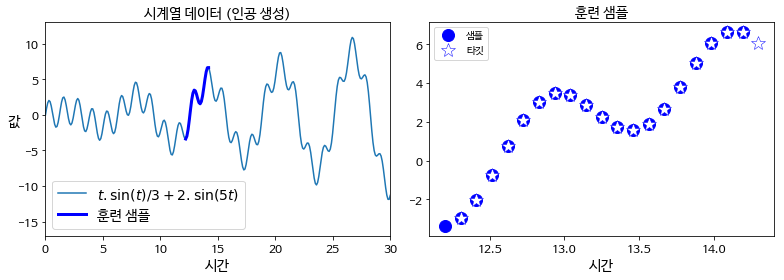

In [43]:
t = np.linspace(t_min, t_max, int((t_max - t_min) / resolution))

n_steps = 20
t_instance = np.linspace(12.2, 12.2 + resolution * (n_steps + 1), n_steps + 1)

plt.figure(figsize=(11,4))
plt.subplot(121)
plt.title("시계열 데이터 (인공 생성)", fontsize=14)
plt.plot(t, time_series(t), label=r"$t . \sin(t) / 3 + 2 . \sin(5t)$")
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "b-", linewidth=3, label="훈련 샘플")
plt.legend(loc="lower left", fontsize=14)
plt.axis([0, 30, -17, 13])
plt.xlabel("시간")
plt.ylabel("값", rotation=0)

plt.subplot(122)
plt.title("훈련 샘플", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=12, label="샘플")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", markeredgewidth=0.5, markeredgecolor="b", markersize=14, label="타깃")
plt.legend(loc="upper left")
plt.xlabel("시간")


save_fig("time_series_plot")
plt.show()

In [44]:
X_batch, y_batch = next_batch(1, n_steps)

In [45]:
np.c_[X_batch[0], y_batch[0]]

array([[ 1.38452097,  2.05081182],
       [ 2.05081182,  2.29742291],
       [ 2.29742291,  2.0465599 ],
       [ 2.0465599 ,  1.34009916],
       [ 1.34009916,  0.32948704],
       [ 0.32948704, -0.76115235],
       [-0.76115235, -1.68967022],
       [-1.68967022, -2.25492776],
       [-2.25492776, -2.34576159],
       [-2.34576159, -1.96789418],
       [-1.96789418, -1.24220428],
       [-1.24220428, -0.37478448],
       [-0.37478448,  0.39387907],
       [ 0.39387907,  0.84815766],
       [ 0.84815766,  0.85045064],
       [ 0.85045064,  0.3752526 ],
       [ 0.3752526 , -0.48422846],
       [-0.48422846, -1.53852738],
       [-1.53852738, -2.54795941],
       [-2.54795941, -3.28097239]])

## `OuputProjectionWrapper` 사용하기

RNN 하나를 만들어 보겠습니다. 이 신경망은 100개의 순환 뉴런을 가지고 있고 각 훈련 샘플은 20개의 입력 길이로 구성되므로 20개의 타임 스텝에 펼칠 것입니다. 각 입력은 하나의 특성을 가집니다(각 시간에서의 값 하나). 타깃도 20개의 입력 시퀀스이고 하나의 값을 가집니다:

In [46]:
reset_graph()

n_steps = 20
n_inputs = 1
n_neurons = 100
n_outputs = 1

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu)
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

각 타임 스텝에서 크기가 100인 출력 벡터가 만들어 집니다. 하지만 각 타임 스텝에서 하나의 출력 값을 원합니다. 간단한 방법은 `OutputProjectionWrapper`로 셀을 감싸는 것입니다.

In [47]:
reset_graph()

n_steps = 20
n_inputs = 1
n_neurons = 100
n_outputs = 1

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

In [48]:
cell = tf.contrib.rnn.OutputProjectionWrapper(
    tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu),
    output_size=n_outputs)

In [49]:
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

In [50]:
learning_rate = 0.001

loss = tf.reduce_mean(tf.square(outputs - y)) # MSE
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()

In [51]:
saver = tf.train.Saver()

In [52]:
n_iterations = 1500
batch_size = 50

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        X_batch, y_batch = next_batch(batch_size, n_steps)
        sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if iteration % 100 == 0:
            mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(iteration, "\tMSE:", mse)
    
    saver.save(sess, "./my_time_series_model") # not shown in the book

0 	MSE: 11.967253
100 	MSE: 0.5267912
200 	MSE: 0.1495199
300 	MSE: 0.07283236
400 	MSE: 0.06168884
500 	MSE: 0.05886846
600 	MSE: 0.05303419
700 	MSE: 0.048641633
800 	MSE: 0.04998502
900 	MSE: 0.047834214
1000 	MSE: 0.04796028
1100 	MSE: 0.04780812
1200 	MSE: 0.0415957
1300 	MSE: 0.047843512
1400 	MSE: 0.04253944


In [53]:
with tf.Session() as sess:                          # 책에는 없음
    saver.restore(sess, "./my_time_series_model")   # 책에는 없음

    X_new = time_series(np.array(t_instance[:-1].reshape(-1, n_steps, n_inputs)))
    y_pred = sess.run(outputs, feed_dict={X: X_new})

INFO:tensorflow:Restoring parameters from ./my_time_series_model


In [54]:
y_pred

array([[[-3.409996 ],
        [-2.4543931],
        [-1.1121919],
        [ 0.7361519],
        [ 2.16957  ],
        [ 3.024978 ],
        [ 3.4844422],
        [ 3.366301 ],
        [ 2.8970137],
        [ 2.213668 ],
        [ 1.6406606],
        [ 1.5506338],
        [ 1.9295691],
        [ 2.7553375],
        [ 3.8671415],
        [ 5.0822144],
        [ 6.0878325],
        [ 6.6626954],
        [ 6.645318 ],
        [ 6.0674458]]], dtype=float32)

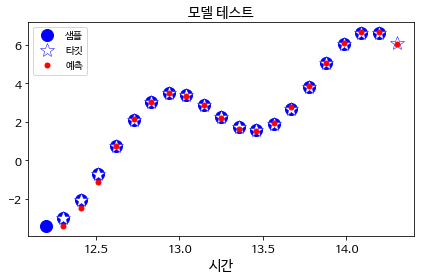

In [55]:
plt.title("모델 테스트", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=12, label="샘플")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", markeredgewidth=0.5, markeredgecolor="b", markersize=14, label="타깃")
plt.plot(t_instance[1:], y_pred[0,:,0], "r.", markersize=10, label="예측")
plt.legend(loc="upper left")
plt.xlabel("시간")

save_fig("time_series_pred_plot")
plt.show()

## `OutputProjectionWrapper` 사용하지 않기

In [56]:
reset_graph()

n_steps = 20
n_inputs = 1
n_neurons = 100

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

In [57]:
cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu)
rnn_outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

In [58]:
n_outputs = 1
learning_rate = 0.001

In [59]:
stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons])
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])

In [60]:
loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [61]:
n_iterations = 1500
batch_size = 50

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        X_batch, y_batch = next_batch(batch_size, n_steps)
        sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if iteration % 100 == 0:
            mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(iteration, "\tMSE:", mse)
    
    X_new = time_series(np.array(t_instance[:-1].reshape(-1, n_steps, n_inputs)))
    y_pred = sess.run(outputs, feed_dict={X: X_new})
    
    saver.save(sess, "./my_time_series_model")

0 	MSE: 13.907028
100 	MSE: 0.5062197
200 	MSE: 0.20180194
300 	MSE: 0.101789564
400 	MSE: 0.06869375
500 	MSE: 0.0650903
600 	MSE: 0.056519922
700 	MSE: 0.048897255
800 	MSE: 0.050609533
900 	MSE: 0.04794232
1000 	MSE: 0.047962066
1100 	MSE: 0.04990514
1200 	MSE: 0.041599542
1300 	MSE: 0.048676066
1400 	MSE: 0.043152742


In [62]:
y_pred

array([[[-3.433237  ],
        [-2.454809  ],
        [-1.0924242 ],
        [ 0.70101255],
        [ 2.1101534 ],
        [ 3.0261526 ],
        [ 3.4682128 ],
        [ 3.321571  ],
        [ 2.8254244 ],
        [ 2.2395434 ],
        [ 1.7126881 ],
        [ 1.5265634 ],
        [ 1.9084352 ],
        [ 2.750864  ],
        [ 3.8967836 ],
        [ 5.1164637 ],
        [ 6.1152263 ],
        [ 6.6678505 ],
        [ 6.6391854 ],
        [ 6.045873  ]]], dtype=float32)

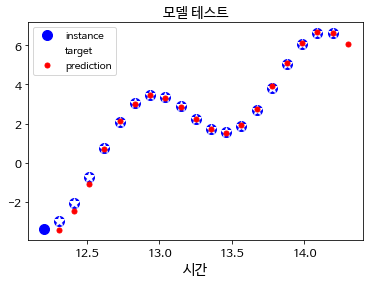

In [63]:
plt.title("모델 테스트", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", markersize=10, label="target")
plt.plot(t_instance[1:], y_pred[0,:,0], "r.", markersize=10, label="prediction")
plt.legend(loc="upper left")
plt.xlabel("시간")

plt.show()

## 새로운 시퀀스 생성하기

In [64]:
with tf.Session() as sess:                        # 책에는 없음
    saver.restore(sess, "./my_time_series_model") # 책에는 없음

    sequence = [0.] * n_steps
    for iteration in range(300):
        X_batch = np.array(sequence[-n_steps:]).reshape(1, n_steps, 1)
        y_pred = sess.run(outputs, feed_dict={X: X_batch})
        sequence.append(y_pred[0, -1, 0])

INFO:tensorflow:Restoring parameters from ./my_time_series_model


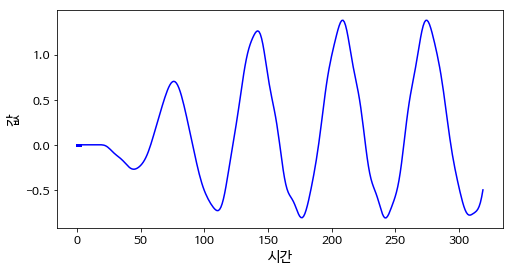

In [65]:
plt.figure(figsize=(8,4))
plt.plot(np.arange(len(sequence)), sequence, "b-")
plt.plot(t[:n_steps], sequence[:n_steps], "b-", linewidth=3)
plt.xlabel("시간")
plt.ylabel("값")
plt.show()

INFO:tensorflow:Restoring parameters from ./my_time_series_model


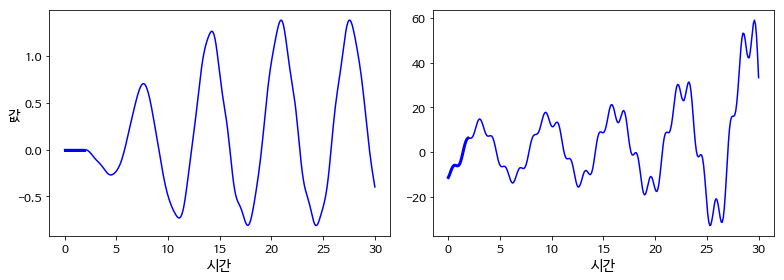

In [66]:
with tf.Session() as sess:
    saver.restore(sess, "./my_time_series_model")

    sequence1 = [0. for i in range(n_steps)]
    for iteration in range(len(t) - n_steps):
        X_batch = np.array(sequence1[-n_steps:]).reshape(1, n_steps, 1)
        y_pred = sess.run(outputs, feed_dict={X: X_batch})
        sequence1.append(y_pred[0, -1, 0])

    sequence2 = [time_series(i * resolution + t_min + (t_max-t_min/3)) for i in range(n_steps)]
    for iteration in range(len(t) - n_steps):
        X_batch = np.array(sequence2[-n_steps:]).reshape(1, n_steps, 1)
        y_pred = sess.run(outputs, feed_dict={X: X_batch})
        sequence2.append(y_pred[0, -1, 0])

plt.figure(figsize=(11,4))
plt.subplot(121)
plt.plot(t, sequence1, "b-")
plt.plot(t[:n_steps], sequence1[:n_steps], "b-", linewidth=3)
plt.xlabel("시간")
plt.ylabel("값", rotation=0)

plt.subplot(122)
plt.plot(t, sequence2, "b-")
plt.plot(t[:n_steps], sequence2[:n_steps], "b-", linewidth=3)
plt.xlabel("시간")
save_fig("creative_sequence_plot")
plt.show()

# 심층 RNN

## MultiRNNCell

In [67]:
reset_graph()

n_inputs = 2
n_steps = 5

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])

In [68]:
n_neurons = 100
n_layers = 3

layers = [tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
          for layer in range(n_layers)]
multi_layer_cell = tf.contrib.rnn.MultiRNNCell(layers)
outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

In [69]:
init = tf.global_variables_initializer()

In [70]:
X_batch = np.random.rand(2, n_steps, n_inputs)

In [71]:
with tf.Session() as sess:
    init.run()
    outputs_val, states_val = sess.run([outputs, states], feed_dict={X: X_batch})

In [72]:
outputs_val.shape

(2, 5, 100)

## 여러 GPU에 심층 RNN 분산하기

이렇게 사용해서는 **안됩니다**:

In [73]:
with tf.device("/gpu:0"):  # 이 할당은 무시됩니다
    layer1 = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)

with tf.device("/gpu:1"):  # 이 할당은 무시됩니다
    layer2 = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)

대신 `DeviceCellWrapper`를 사용합니다:

In [74]:
import tensorflow as tf

class DeviceCellWrapper(tf.contrib.rnn.RNNCell):
  def __init__(self, device, cell):
    self._cell = cell
    self._device = device

  @property
  def state_size(self):
    return self._cell.state_size

  @property
  def output_size(self):
    return self._cell.output_size

  def __call__(self, inputs, state, scope=None):
    with tf.device(self._device):
        return self._cell(inputs, state, scope)

In [75]:
reset_graph()

n_inputs = 5
n_steps = 20
n_neurons = 100

X = tf.placeholder(tf.float32, shape=[None, n_steps, n_inputs])

In [76]:
devices = ["/cpu:0", "/cpu:0", "/cpu:0"] # 만약 GPU가 세 개 있다면 ["/gpu:0", "/gpu:1", "/gpu:2"]로 바꿉니다
cells = [DeviceCellWrapper(dev,tf.contrib.rnn.BasicRNNCell(num_units=n_neurons))
         for dev in devices]
multi_layer_cell = tf.contrib.rnn.MultiRNNCell(cells)
outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

또 다른 방법으로 텐서플로 1.1부터 `tf.contrib.rnn.DeviceWrapper` 클래스를 사용할 수 있습니다(텐서플로 1.2부터는 `tf.nn.rnn_cell.DeviceWrapper`가 되었습니다).

In [77]:
init = tf.global_variables_initializer()

In [78]:
with tf.Session() as sess:
    init.run()
    print(sess.run(outputs, feed_dict={X: np.random.rand(2, n_steps, n_inputs)}))

[[[-3.29020061e-02  1.17019236e-01 -4.58992608e-02 ...  3.84477153e-02
   -5.24900258e-02  5.80436960e-02]
  [ 3.54288332e-02 -7.42610693e-02 -6.42375052e-02 ... -2.45757148e-01
   -1.77626804e-01 -3.26535292e-03]
  [ 2.59726584e-01  1.44605249e-01  3.29312116e-01 ...  3.38821977e-01
    5.98853417e-02 -8.31450596e-02]
  ...
  [ 1.18043743e-01 -2.41663873e-01 -8.27798247e-01 ... -1.85782462e-01
    1.89682379e-01 -1.35261893e-01]
  [ 2.87830859e-01  3.92953992e-01 -3.15236300e-01 ... -7.85605535e-02
    4.32724983e-01 -6.61824420e-02]
  [ 7.49779761e-01  6.11052871e-01 -3.01685542e-01 ...  1.95649698e-01
   -1.62457466e-01 -5.23968339e-02]]

 [[-6.68027624e-02  7.35576972e-02 -2.90275402e-02 ... -7.79968277e-02
   -3.65773253e-02 -4.66752201e-02]
  [ 1.71546549e-01  4.28418722e-03  2.18812120e-03 ...  3.68538052e-02
   -8.13241452e-02  9.01001915e-02]
  [ 3.45635489e-02 -9.57525298e-02  1.59450233e-01 ...  1.63022086e-01
   -6.83046281e-02  1.07990295e-01]
  ...
  [ 1.96414590e-01 -2.1

## 드롭아웃

In [79]:
reset_graph()

n_inputs = 1
n_neurons = 100
n_layers = 3
n_steps = 20
n_outputs = 1

In [80]:
X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

노트: `input_keep_prob` 매개변수는 플레이스홀더로 훈련하는 동안에는 어느 값이나 가능하고 테스트할 때는 1.0으로 지정합니다(드롭아웃을 끕니다).

In [81]:
keep_prob = tf.placeholder_with_default(1.0, shape=())
cells = [tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
         for layer in range(n_layers)]
cells_drop = [tf.contrib.rnn.DropoutWrapper(cell, input_keep_prob=keep_prob)
              for cell in cells]
multi_layer_cell = tf.contrib.rnn.MultiRNNCell(cells_drop)
rnn_outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

In [82]:
learning_rate = 0.01

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons])
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])

loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [83]:
n_iterations = 1500
batch_size = 50
train_keep_prob = 0.5

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        X_batch, y_batch = next_batch(batch_size, n_steps)
        _, mse = sess.run([training_op, loss],
                          feed_dict={X: X_batch, y: y_batch,
                                     keep_prob: train_keep_prob})
        if iteration % 100 == 0:                   # not shown in the book
            print(iteration, "훈련 MSE:", mse) # not shown
    
    saver.save(sess, "./my_dropout_time_series_model")

0 훈련 MSE: 16.386942
100 훈련 MSE: 4.25324
200 훈련 MSE: 3.2349327
300 훈련 MSE: 3.5502756
400 훈련 MSE: 2.6301303
500 훈련 MSE: 4.105153
600 훈련 MSE: 3.5806417
700 훈련 MSE: 3.3154318
800 훈련 MSE: 3.5841472
900 훈련 MSE: 3.4554102
1000 훈련 MSE: 3.165893
1100 훈련 MSE: 3.691963
1200 훈련 MSE: 3.7539616
1300 훈련 MSE: 2.4574566
1400 훈련 MSE: 3.9499161


In [84]:
with tf.Session() as sess:
    saver.restore(sess, "./my_dropout_time_series_model")

    X_new = time_series(np.array(t_instance[:-1].reshape(-1, n_steps, n_inputs)))
    y_pred = sess.run(outputs, feed_dict={X: X_new})

INFO:tensorflow:Restoring parameters from ./my_dropout_time_series_model


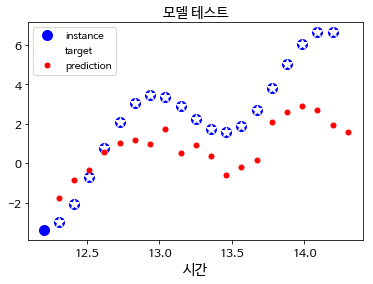

In [85]:
plt.title("모델 테스트", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", markersize=10, label="target")
plt.plot(t_instance[1:], y_pred[0,:,0], "r.", markersize=10, label="prediction")
plt.legend(loc="upper left")
plt.xlabel("시간")

plt.show()

이런 드롭아웃이 이 경우엔 크게 도움이 안되네요. :/

# LSTM

In [86]:
reset_graph()

lstm_cell = tf.contrib.rnn.BasicLSTMCell(num_units=n_neurons)

In [87]:
n_steps = 28
n_inputs = 28
n_neurons = 150
n_outputs = 10
n_layers = 3

learning_rate = 0.001

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.int32, [None])

lstm_cells = [tf.contrib.rnn.BasicLSTMCell(num_units=n_neurons)
              for layer in range(n_layers)]
multi_cell = tf.contrib.rnn.MultiRNNCell(lstm_cells)
outputs, states = tf.nn.dynamic_rnn(multi_cell, X, dtype=tf.float32)
top_layer_h_state = states[-1][1]
logits = tf.layers.dense(top_layer_h_state, n_outputs, name="softmax")
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy, name="loss")
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
init = tf.global_variables_initializer()

In [88]:
states

(LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_3:0' shape=(?, 150) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_4:0' shape=(?, 150) dtype=float32>),
 LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_5:0' shape=(?, 150) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_6:0' shape=(?, 150) dtype=float32>),
 LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_7:0' shape=(?, 150) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_8:0' shape=(?, 150) dtype=float32>))

In [89]:
top_layer_h_state

<tf.Tensor 'rnn/while/Exit_8:0' shape=(?, 150) dtype=float32>

In [90]:
n_epochs = 10
batch_size = 150

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            X_batch = X_batch.reshape((batch_size, n_steps, n_inputs))
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
        print("에포크", epoch, "훈련 정확도 =", acc_train, "테스트 정확도 =", acc_test)

에포크 0 훈련 정확도 = 0.9533333 테스트 정확도 = 0.9549
에포크 1 훈련 정확도 = 0.9866667 테스트 정확도 = 0.9733
에포크 2 훈련 정확도 = 0.99333334 테스트 정확도 = 0.9769
에포크 3 훈련 정확도 = 0.99333334 테스트 정확도 = 0.9807
에포크 4 훈련 정확도 = 0.98 테스트 정확도 = 0.9845
에포크 5 훈련 정확도 = 0.9866667 테스트 정확도 = 0.9815
에포크 6 훈련 정확도 = 0.99333334 테스트 정확도 = 0.9845
에포크 7 훈련 정확도 = 1.0 테스트 정확도 = 0.9876
에포크 8 훈련 정확도 = 1.0 테스트 정확도 = 0.9877
에포크 9 훈련 정확도 = 0.99333334 테스트 정확도 = 0.9881


In [91]:
lstm_cell = tf.contrib.rnn.LSTMCell(num_units=n_neurons, use_peepholes=True)

In [92]:
gru_cell = tf.contrib.rnn.GRUCell(num_units=n_neurons)

# 임베딩

이 섹션은 텐서플로의 [Word2Vec 튜토리얼](https://www.tensorflow.org/versions/r0.11/tutorials/word2vec/index.html)을 기반으로 합니다.

## 데이터 추출

In [93]:
from six.moves import urllib

import errno
import os
import zipfile

WORDS_PATH = "datasets/words"
WORDS_URL = 'http://mattmahoney.net/dc/text8.zip'

def mkdir_p(path):
    """디렉토리 생성, 이미 있다면 그냥 통과
    
    이 함수는 파이썬 2 버전을 지원하기 위해서입니다.
    파이썬 3.2 이상이면 다음과 같이 쓸 수 있습니다:
    >>> os.makedirs(path, exist_ok=True)
    """
    try:
        os.makedirs(path)
    except OSError as exc:
        if exc.errno == errno.EEXIST and os.path.isdir(path):
            pass
        else:
            raise

def fetch_words_data(words_url=WORDS_URL, words_path=WORDS_PATH):
    os.makedirs(words_path, exist_ok=True)
    zip_path = os.path.join(words_path, "words.zip")
    if not os.path.exists(zip_path):
        urllib.request.urlretrieve(words_url, zip_path)
    with zipfile.ZipFile(zip_path) as f:
        data = f.read(f.namelist()[0])
    return data.decode("ascii").split()

In [94]:
words = fetch_words_data()

In [95]:
words[:5]

['anarchism', 'originated', 'as', 'a', 'term']

## 사전 구축

In [96]:
from collections import Counter

vocabulary_size = 50000

vocabulary = [("UNK", None)] + Counter(words).most_common(vocabulary_size - 1)
vocabulary = np.array([word for word, _ in vocabulary])
dictionary = {word: code for code, word in enumerate(vocabulary)}
data = np.array([dictionary.get(word, 0) for word in words])

In [97]:
" ".join(words[:9]), data[:9]

('anarchism originated as a term of abuse first used',
 array([5244, 3083,   12,    6,  195,    2, 3135,   46,   59]))

In [98]:
" ".join([vocabulary[word_index] for word_index in [5241, 3081, 12, 6, 195, 2, 3134, 46, 59]])

'belonging didn as a term of extinct first used'

In [99]:
words[24], data[24]

('culottes', 0)

## 배치 생성

In [100]:
import random
from collections import deque

def generate_batch(batch_size, num_skips, skip_window):
    global data_index
    assert batch_size % num_skips == 0
    assert num_skips <= 2 * skip_window
    batch = np.ndarray(shape=(batch_size), dtype=np.int32)
    labels = np.ndarray(shape=(batch_size, 1), dtype=np.int32)
    span = 2 * skip_window + 1 # [ skip_window target skip_window ]
    buffer = deque(maxlen=span)
    for _ in range(span):
        buffer.append(data[data_index])
        data_index = (data_index + 1) % len(data)
    for i in range(batch_size // num_skips):
        target = skip_window  # buffer 중간에 타깃 레이블을 둡니다
        targets_to_avoid = [ skip_window ]
        for j in range(num_skips):
            while target in targets_to_avoid:
                target = random.randint(0, span - 1)
            targets_to_avoid.append(target)
            batch[i * num_skips + j] = buffer[skip_window]
            labels[i * num_skips + j, 0] = buffer[target]
        buffer.append(data[data_index])
        data_index = (data_index + 1) % len(data)
    return batch, labels

In [101]:
data_index=0
batch, labels = generate_batch(8, 2, 1)

In [102]:
batch, [vocabulary[word] for word in batch]

(array([3083, 3083,   12,   12,    6,    6,  195,  195], dtype=int32),
 ['originated', 'originated', 'as', 'as', 'a', 'a', 'term', 'term'])

In [103]:
labels, [vocabulary[word] for word in labels[:, 0]]

(array([[  12],
        [5244],
        [   6],
        [3083],
        [ 195],
        [  12],
        [   2],
        [   6]], dtype=int32),
 ['as', 'anarchism', 'a', 'originated', 'term', 'as', 'of', 'a'])

## 모델 구성

In [104]:
batch_size = 128
embedding_size = 128  # 임베딩 벡터 차원
skip_window = 1       # 고려할 왼쪽과 오른쪽 단어의 개수
num_skips = 2         # 레이블을 생성하기 위한 입력의 재사용 횟수

# 가까운 이웃을 샘플링하기 위해 랜덤한 검증 세트를 만듭니다.
# 검증 샘플은 가장 흔한 단어인 낮은 ID 번호를 가진 것으로 제한합니다.
valid_size = 16     # 유사도를 평가하기 위해 랜덤하게 구성할 단어 세트 크기
valid_window = 100  # 검증 샘플을 전체 샘플의 앞 부분에서만 선택합니다
valid_examples = np.random.choice(valid_window, valid_size, replace=False)
num_sampled = 64    # 부정 샘플링(negative sampling)의 수

learning_rate = 0.01

In [105]:
reset_graph()

# 입력 데이터
train_labels = tf.placeholder(tf.int32, shape=[batch_size, 1])
valid_dataset = tf.constant(valid_examples, dtype=tf.int32)

In [106]:
vocabulary_size = 50000
embedding_size = 150

# 입력을 위해 임베딩을 조회합니다
init_embeds = tf.random_uniform([vocabulary_size, embedding_size], -1.0, 1.0)
embeddings = tf.Variable(init_embeds)

In [107]:
train_inputs = tf.placeholder(tf.int32, shape=[None])
embed = tf.nn.embedding_lookup(embeddings, train_inputs)

In [108]:
# NCE 손실을 위한 변수를 만듭니다
nce_weights = tf.Variable(
    tf.truncated_normal([vocabulary_size, embedding_size],
                        stddev=1.0 / np.sqrt(embedding_size)))
nce_biases = tf.Variable(tf.zeros([vocabulary_size]))

# 배치에서 NCE 손실의 평균을 계산합니다.Compute the average NCE loss for the batch.
# tf.nce_loss는 자동으로 손실을 평가할 때마다 음성 레이블에서 새로운 샘플을 뽑습니다.
loss = tf.reduce_mean(
    tf.nn.nce_loss(nce_weights, nce_biases, train_labels, embed,
                   num_sampled, vocabulary_size))

# Adam 옵티마이저
optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(loss)

# 미니배치 샘플과 모든 임베딩 사이의 코사인 유사도를 계산합니다
norm = tf.sqrt(tf.reduce_sum(tf.square(embeddings), axis=1, keep_dims=True))
normalized_embeddings = embeddings / norm
valid_embeddings = tf.nn.embedding_lookup(normalized_embeddings, valid_dataset)
similarity = tf.matmul(valid_embeddings, normalized_embeddings, transpose_b=True)

# 초기화를 위한 연산
init = tf.global_variables_initializer()

Instructions for updating:
keep_dims is deprecated, use keepdims instead


## 모델 훈련

In [109]:
num_steps = 10001

with tf.Session() as session:
    init.run()

    average_loss = 0
    for step in range(num_steps):
        print("\r반복: {}".format(step), end="\t")
        batch_inputs, batch_labels = generate_batch(batch_size, num_skips, skip_window)
        feed_dict = {train_inputs : batch_inputs, train_labels : batch_labels}

        # 훈련 연산을 평가하여 스텝을 한 단계를 업데이트합니다(session.run()에서 반환된 값을 사용합니다)
        _, loss_val = session.run([training_op, loss], feed_dict=feed_dict)
        average_loss += loss_val

        if step % 2000 == 0:
            if step > 0:
                average_loss /= 2000
            # 평균 손실은 2000개 배치에 대한 손실의 추정입니다.
            print("스텝 ", step, "에서의 평균 손실: ", average_loss)
            average_loss = 0

        # 이 코드는 비용이 많이 듭니다 (500 스텝마다 ~20%씩 느려집니다)
        if step % 10000 == 0:
            sim = similarity.eval()
            for i in range(valid_size):
                valid_word = vocabulary[valid_examples[i]]
                top_k = 8 # 가장 가까운 단어의 개수
                nearest = (-sim[i, :]).argsort()[1:top_k+1]
                log_str = "%s에 가장 가까운 단어:" % valid_word
                for k in range(top_k):
                    close_word = vocabulary[nearest[k]]
                    log_str = "%s %s," % (log_str, close_word)
                print(log_str)

    final_embeddings = normalized_embeddings.eval()

반복: 0	스텝  0 에서의 평균 손실:  294.72406005859375
would에 가장 가까운 단어: lindy, humorously, engagements, bek, phoenicia, showcase, losing, nf,
on에 가장 가까운 단어: imprints, arbitrarily, cis, prefect, saccharomyces, jj, classmate, ave,
four에 가장 가까운 단어: citations, insist, tank, macarthur, uneducated, plissken, riordan, vasili,
his에 가장 가까운 단어: generous, archie, themes, achieved, somehow, bartle, value, lexis,
often에 가장 가까운 단어: deception, sticks, hitomaro, subtract, calculates, darrow, lavender, anthony,
in에 가장 가까운 단어: termini, bubonic, elaborating, commence, tobacco, subdivided, competing, puppets,
an에 가장 가까운 단어: queene, lavon, chestnuts, solomon, clayton, voce, abolishes, patched,
eight에 가장 가까운 단어: rig, retaliated, spr, bump, poinsot, wild, sportspeople, bison,
these에 가장 가까운 단어: conferences, ypres, neck, refrain, bessarabia, cord, gravely, reconciling,
nine에 가장 가까운 단어: pittsburg, trivia, carol, menorah, overwriting, audition, develop, ranks,
called에 가장 가까운 단어: bon, dealing, stallion, hata, ise, vadim, si

마지막 임베딩을 저장합니다(물론 텐서플로의 `Saver`를 사용해도 됩니다):

In [110]:
np.save("./my_final_embeddings.npy", final_embeddings)

## 임베딩 그래프

In [111]:
def plot_with_labels(low_dim_embs, labels):
    assert low_dim_embs.shape[0] >= len(labels), "임베딩보다 레이블이 많습니다."
    plt.figure(figsize=(18, 18))  # 인치 크기
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i,:]
        plt.scatter(x, y)
        plt.annotate(label,
                     xy=(x, y),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')

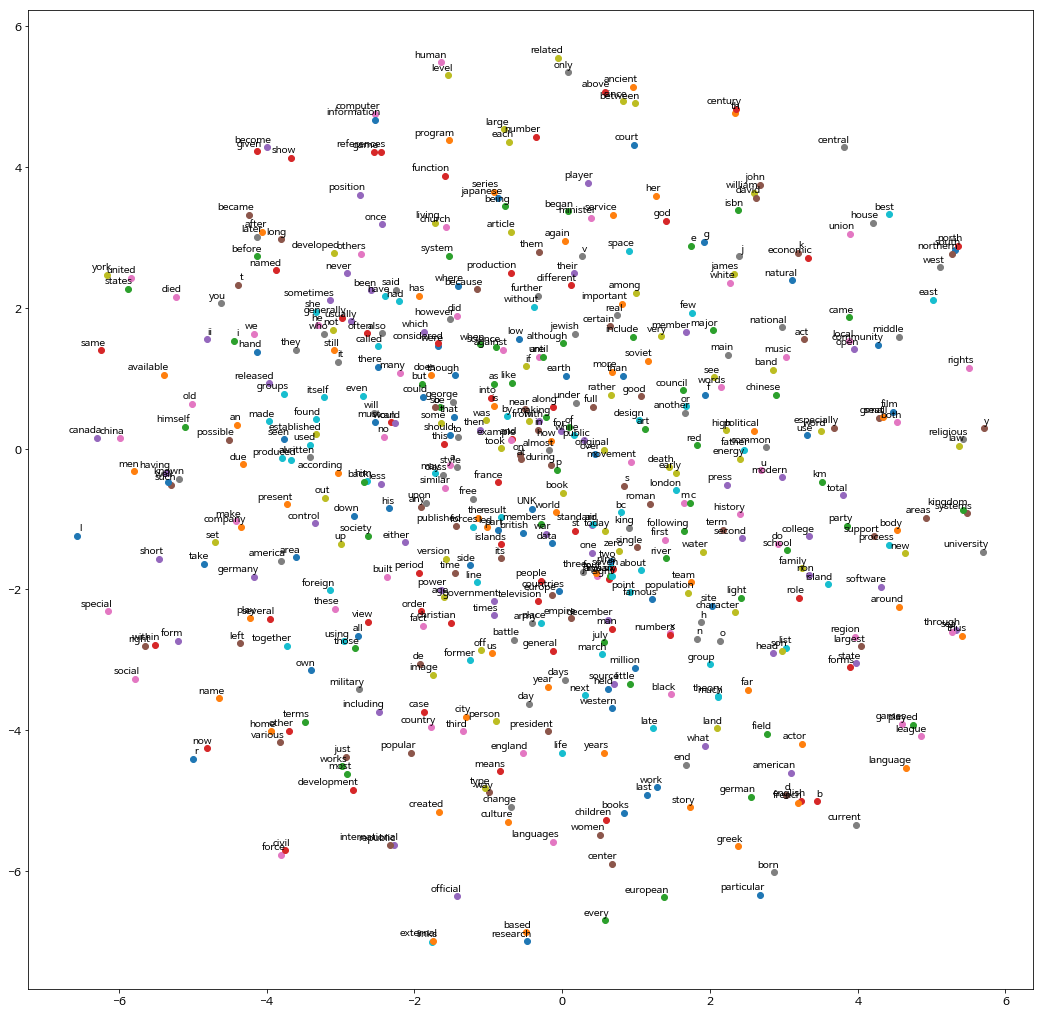

In [112]:
from sklearn.manifold import TSNE

tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
plot_only = 500
low_dim_embs = tsne.fit_transform(final_embeddings[:plot_only,:])
labels = [vocabulary[i] for i in range(plot_only)]
plot_with_labels(low_dim_embs, labels)

# 기계 번역

`basic_rnn_seq2seq()` 함수는 간단한 인코더/디코더 모델을 만듭니다. 먼저 `encoder_inputs`를 상태 벡터로 인코딩하는 RNN을 실행하고 그다음 `decoder_inputs`을 마지막 인코더 상태로 초기화시킨 디코더를 실행합니다. 인코더와 디코더는 같은 RNN 셀 타입을 사용하지만 파라미터를 공유하지는 않습니다.

In [113]:
import tensorflow as tf
reset_graph()

n_steps = 50
n_neurons = 200
n_layers = 3
num_encoder_symbols = 20000
num_decoder_symbols = 20000
embedding_size = 150
learning_rate = 0.01

X = tf.placeholder(tf.int32, [None, n_steps]) # 영어 문장
Y = tf.placeholder(tf.int32, [None, n_steps]) # 프랑스어 번역
W = tf.placeholder(tf.float32, [None, n_steps - 1, 1])
Y_input = Y[:, :-1]
Y_target = Y[:, 1:]

encoder_inputs = tf.unstack(tf.transpose(X)) # 1D 텐서의 리스트
decoder_inputs = tf.unstack(tf.transpose(Y_input)) # 1D 텐서의 리스트

lstm_cells = [tf.contrib.rnn.BasicLSTMCell(num_units=n_neurons)
              for layer in range(n_layers)]
cell = tf.contrib.rnn.MultiRNNCell(lstm_cells)

output_seqs, states = tf.contrib.legacy_seq2seq.embedding_rnn_seq2seq(
    encoder_inputs,
    decoder_inputs,
    cell,
    num_encoder_symbols,
    num_decoder_symbols,
    embedding_size)

logits = tf.transpose(tf.unstack(output_seqs), perm=[1, 0, 2])

In [114]:
logits_flat = tf.reshape(logits, [-1, num_decoder_symbols])
Y_target_flat = tf.reshape(Y_target, [-1])
W_flat = tf.reshape(W, [-1])
xentropy = W_flat * tf.nn.sparse_softmax_cross_entropy_with_logits(labels=Y_target_flat, logits=logits_flat)
loss = tf.reduce_mean(xentropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()

# 연습문제 해답

## 1. to 6.

부록 A 참조.

## 7. 임베딩된 레버(Reber) 문법

먼저 문법에 맞는 문자열을 생성하는 함수가 필요합니다. 이 문법은 각 상태에서 가능한 전이 상태의 리스트입니다. 하나의 전이는 출력할 문자열(또는 생성할 문법)과 다음 상태를 지정합니다.

In [115]:
from random import choice, seed

# 일관된 출력을 위한 유사난수 초기화
seed(42)
np.random.seed(42)

default_reber_grammar = [
    [("B", 1)],           # (상태 0) =B=>(상태 1)
    [("T", 2), ("P", 3)], # (상태 1) =T=>(상태 2) or =P=>(상태 3)
    [("S", 2), ("X", 4)], # (상태 2) =S=>(상태 2) or =X=>(상태 4)
    [("T", 3), ("V", 5)], # 등등..
    [("X", 3), ("S", 6)],
    [("P", 4), ("V", 6)],
    [("E", None)]]        # (상태 6) =E=>(종료 상태)

embedded_reber_grammar = [
    [("B", 1)],
    [("T", 2), ("P", 3)],
    [(default_reber_grammar, 4)],
    [(default_reber_grammar, 5)],
    [("T", 6)],
    [("P", 6)],
    [("E", None)]]

def generate_string(grammar):
    state = 0
    output = []
    while state is not None:
        production, state = choice(grammar[state])
        if isinstance(production, list):
            production = generate_string(grammar=production)
        output.append(production)
    return "".join(output)

기본 레버 문법에 맞는 문자열을 몇 개 만들어 보겠습니다:

In [116]:
for _ in range(25):
    print(generate_string(default_reber_grammar), end=" ")

BTXXTTTTVPXTTTTTVPSE BTXSE BTXXTVPSE BTXXVPSE BTSSXXTTVVE BTXSE BTSSSXSE BPTTTVVE BTXXVVE BPTTVVE BTSXXTTTTVPSE BPTTVVE BPTVPSE BPTTVPXVVE BPVPXTTTVPXTVPSE BTXSE BPTTTTVPXTTTTTTTVPXVVE BPTVVE BTXSE BPTTTVVE BTSXXVPSE BTXXTTTTTVVE BPTTVPSE BPVVE BPTTTVPXVPXTTTTTVPXTTVVE 

좋습니다. 이제 임베딩된 레버 문법에 맞는 문자열을 몇 개 만들어 보겠습니다:

In [117]:
for _ in range(25):
    print(generate_string(embedded_reber_grammar), end=" ")

BPBPTVVEPE BTBPTVPXVVETE BPBPTTTVVEPE BPBTXSEPE BPBPTTTTTVPSEPE BTBTSXSETE BPBPVPSEPE BPBPVVEPE BPBTXSEPE BPBTSXSEPE BTBPTTVVETE BPBPVVEPE BTBTXSETE BPBPTTVVEPE BTBTSXXVVETE BTBTXXTVPXTVPSETE BTBPTVVETE BPBPVPXTTVPXTVVEPE BTBTXSETE BPBTXSEPE BPBTSXXTVPSEPE BPBPVVEPE BPBPTTTTTTTTTTVPXVVEPE BPBPVVEPE BPBPVVEPE 

좋네요, 이제 이 문법을 따르지 않는 문자열을 생성할 함수를 만듭니다. 무작위하게 문자열을 만들 수 있지만 그렇게 하면 너무 문제가 쉬워지므로 대신 문법을 따르는 문자열을 만든 후 하나의 문자만 바꾸어 놓도록 하겠습니다:

In [118]:
def generate_corrupted_string(grammar, chars="BEPSTVX"):
    good_string = generate_string(grammar)
    index = np.random.randint(len(good_string))
    good_char = good_string[index]
    bad_char = choice(list(set(chars) - set(good_char)))
    return good_string[:index] + bad_char + good_string[index + 1:]

잘못된 문자열 몇 개를 만들어 보죠:

In [119]:
for _ in range(25):
    print(generate_corrupted_string(embedded_reber_grammar), end=" ")

BPBPVPPEPE BPBSXSEPE BPBPTVVTPE BTBPEPSETE BTBPVVVTE BPBTSSXXTSTVVEPE BPVTSXXTVPSEPE BPBTXSPPE BTBPTTTVPSTTE BPBTSXXTTTXTTVVEPE BPBBXXVPXTVPXTTVVEPE BPBPTTVXEPE BPBPVVEEE BPPPTTVVEPE BPBPVESEPE BPBTBXXVVEPE BVBPTTTVPXVVETE BPBTSSXVEPE BPBPVXEPE BVBTXSEPE BTBPTVPXVPXVVETV EPBTSXXTVPXVPSEPE BPBTSXXTTTVBSEPE BPBPVPXVVPPE BTBTSBSETE 

문자열을 바로 RNN에 주입할 수는 없습니다. 먼저 벡터의 연속으로 바꾸어야 합니다. 각 벡터는 원-핫 인코딩을 사용하여 하나의 문자를 나타냅니다. 예를 들어, 벡터 `[1, 0, 0, 0, 0, 0, 0]`는 문자 "B"를 나타내고 벡터 `[0, 1, 0, 0, 0, 0, 0]`는 문자 "E"를 나타내는 식입니다. 이런 원-핫 벡터의 연속으로 문자열을 바꾸는 함수를 작성해 보겠습니다. 문자열이 `n_steps`보다 짧으면 0 벡터로 패딩됩니다(나중에, 텐서플로에게 각 문자열의 실제 길이를 `sequence_length` 매개변수로 전달할 것입니다).

In [120]:
def string_to_one_hot_vectors(string, n_steps, chars="BEPSTVX"):
    char_to_index = {char: index for index, char in enumerate(chars)}
    output = np.zeros((n_steps, len(chars)), dtype=np.int32)
    for index, char in enumerate(string):
        output[index, char_to_index[char]] = 1.
    return output

In [121]:
string_to_one_hot_vectors("BTBTXSETE", 12)

array([[1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]], dtype=int32)

이제 50%는 올바른 문자열 50%는 잘못된 문자열로 이루어진 데이터셋을 만듭니다:

In [122]:
def generate_dataset(size):
    good_strings = [generate_string(embedded_reber_grammar)
                    for _ in range(size // 2)]
    bad_strings = [generate_corrupted_string(embedded_reber_grammar)
                   for _ in range(size - size // 2)]
    all_strings = good_strings + bad_strings
    n_steps = max([len(string) for string in all_strings])
    X = np.array([string_to_one_hot_vectors(string, n_steps)
                  for string in all_strings])
    seq_length = np.array([len(string) for string in all_strings])
    y = np.array([[1] for _ in range(len(good_strings))] +
                 [[0] for _ in range(len(bad_strings))])
    rnd_idx = np.random.permutation(size)
    return X[rnd_idx], seq_length[rnd_idx], y[rnd_idx]

In [123]:
X_train, l_train, y_train = generate_dataset(10000)

첫 번째 훈련 샘플을 확인해 보겠습니다:

In [124]:
X_train[0]

array([[1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0,

데이터셋에서 가장 긴 문자열 때문에 패딩된 0 벡터가 많습니다. 문자열 길이가 얼마나 될까요?

In [125]:
l_train[0]

23

타깃 클래스는?

In [126]:
y_train[0]

array([0])

아주 좋습니다! 올바른 문자열을 구분할 RNN을 만들 준비가 되었습니다. 앞서 MNIST 이미지를 분류하기 위해 만든 것과 매우 비슷한 시퀀스 분류기를 만듭니다. 차이점은 다음 두 가지입니다:
* 첫째, 입력 문자열이 가변 길이이므로 `dynamic_rnn()` 함수를 호출할 때 `sequence_length`를 지정해야 합니다.
* 둘째, 이진 분류기이므로 출력 뉴런은 하나만 필요합니다. 이 뉴런은 각 문자열에 대해 올바른 문자열일 추정 로그 확률을 출력할 것입니다. 다중 클래스 분류에서는 `sparse_softmax_cross_entropy_with_logits()`를 사용했지만 이진 분류에서는 `sigmoid_cross_entropy_with_logits()`를 사용합니다.

In [127]:
reset_graph()

possible_chars = "BEPSTVX"
n_inputs = len(possible_chars)
n_neurons = 30
n_outputs = 1

learning_rate = 0.02
momentum = 0.95

X = tf.placeholder(tf.float32, [None, None, n_inputs], name="X")
seq_length = tf.placeholder(tf.int32, [None], name="seq_length")
y = tf.placeholder(tf.float32, [None, 1], name="y")

gru_cell = tf.contrib.rnn.GRUCell(num_units=n_neurons)
outputs, states = tf.nn.dynamic_rnn(gru_cell, X, dtype=tf.float32,
                                    sequence_length=seq_length)

logits = tf.layers.dense(states, n_outputs, name="logits")
y_pred = tf.cast(tf.greater(logits, 0.), tf.float32, name="y_pred")
y_proba = tf.nn.sigmoid(logits, name="y_proba")

xentropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy, name="loss")
optimizer = tf.train.MomentumOptimizer(learning_rate=learning_rate,
                                       momentum=momentum,
                                       use_nesterov=True)
training_op = optimizer.minimize(loss)

correct = tf.equal(y_pred, y, name="correct")
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")

init = tf.global_variables_initializer()
saver = tf.train.Saver()

훈련하는 동안 진척 상황을 확인할 수 있도록 검증 세트를 만듭니다:

In [128]:
X_val, l_val, y_val = generate_dataset(5000)

In [129]:
n_epochs = 50
batch_size = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        X_batches = np.array_split(X_train, len(X_train) // batch_size)
        l_batches = np.array_split(l_train, len(l_train) // batch_size)
        y_batches = np.array_split(y_train, len(y_train) // batch_size)
        for X_batch, l_batch, y_batch in zip(X_batches, l_batches, y_batches):
            loss_val, _ = sess.run(
                [loss, training_op],
                feed_dict={X: X_batch, seq_length: l_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, seq_length: l_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: X_val, seq_length: l_val, y: y_val})
        print("{:4d}  훈련 손실: {:.4f}, 정확도: {:.2f}%  검증 세트 정확도: {:.2f}%".format(
            epoch, loss_val, 100 * acc_train, 100 * acc_val))
        saver.save(sess, "./my_reber_classifier")

   0  훈련 손실: 0.6829, 정확도: 54.00%  검증 세트 정확도: 58.80%
   1  훈련 손실: 0.6518, 정확도: 64.00%  검증 세트 정확도: 62.38%
   2  훈련 손실: 0.6082, 정확도: 72.00%  검증 세트 정확도: 67.86%
   3  훈련 손실: 0.6268, 정확도: 64.00%  검증 세트 정확도: 66.56%
   4  훈련 손실: 0.4726, 정확도: 74.00%  검증 세트 정확도: 77.60%
   5  훈련 손실: 0.3666, 정확도: 84.00%  검증 세트 정확도: 84.02%
   6  훈련 손실: 0.3469, 정확도: 90.00%  검증 세트 정확도: 81.58%
   7  훈련 손실: 0.2350, 정확도: 76.00%  검증 세트 정확도: 71.58%
   8  훈련 손실: 0.2000, 정확도: 94.00%  검증 세트 정확도: 95.86%
   9  훈련 손실: 0.4007, 정확도: 74.00%  검증 세트 정확도: 76.34%
  10  훈련 손실: 0.3353, 정확도: 88.00%  검증 세트 정확도: 90.50%
  11  훈련 손실: 0.0116, 정확도: 100.00%  검증 세트 정확도: 99.44%
  12  훈련 손실: 0.0029, 정확도: 100.00%  검증 세트 정확도: 99.90%
  13  훈련 손실: 0.0016, 정확도: 100.00%  검증 세트 정확도: 99.96%
  14  훈련 손실: 0.0011, 정확도: 100.00%  검증 세트 정확도: 100.00%
  15  훈련 손실: 0.0010, 정확도: 100.00%  검증 세트 정확도: 100.00%
  16  훈련 손실: 0.0009, 정확도: 100.00%  검증 세트 정확도: 100.00%
  17  훈련 손실: 0.0007, 정확도: 100.00%  검증 세트 정확도: 100.00%
  18  훈련 손실: 0.0006, 정확도: 100.00%  검증 세트 정확도: 100.00%

이제 두 개의 문자열에 이 RNN을 테스트해 보죠. 첫 번째는 잘못된 것이고 두 번째는 올바른 것입니다. 이 문자열은 마지막에서 두 번째 글자만 다릅니다. RNN이 이를 맞춘다면 두 번째 문자가 항상 끝에서 두 번째 문자와 같아야 한다는 패턴을 알게 됐다는 것을 의미합니다. 이렇게 하려면 꽤 긴 단기 기억(long short-term memory)이 필요합니다(그래서 GRU 셀을 사용했습니다).

In [130]:
test_strings = [
    "BPBTSSSSSSSSSSSSXXTTTTTVPXTTVPXTTTTTTTVPXVPXVPXTTTVVETE",
    "BPBTSSSSSSSSSSSSXXTTTTTVPXTTVPXTTTTTTTVPXVPXVPXTTTVVEPE"]
l_test = np.array([len(s) for s in test_strings])
max_length = l_test.max()
X_test = [string_to_one_hot_vectors(s, n_steps=max_length)
          for s in test_strings]

with tf.Session() as sess:
    saver.restore(sess, "my_reber_classifier")
    y_proba_val = y_proba.eval(feed_dict={X: X_test, seq_length: l_test})

print()
print("레버 문자열일 추정 확률:")
for index, string in enumerate(test_strings):
    print("{}: {:.2f}%".format(string, y_proba_val[index][0]))

INFO:tensorflow:Restoring parameters from my_reber_classifier

레버 문자열일 추정 확률:
BPBTSSSSSSSSSSSSXXTTTTTVPXTTVPXTTTTTTTVPXVPXVPXTTTVVETE: 0.00%
BPBTSSSSSSSSSSSSXXTTTTTVPXTTVPXTTTTTTTVPXVPXVPXTTTVVEPE: 1.00%


쨘! 잘 작동하네요. 이 RNN이 완벽한 신뢰도로 정확한 답을 냈습니다. :)

## 8. 과 9.

Coming soon...